# Week 8: Unsupervised Learning and Clustering
    Hands-on Traning: Clustering Analysis 
    Date: 05/16/2025 


---

### **Table of Contents**  
1. [**Introduction**](#introduction)  
2. [**Baseline Model Training**](#baseline-model-training)  
3. [**Hyperparameter Tuning**](#hyperparameter-tuning)  
4. [**Model Evaluation**](#model-evaluation)  
5. [**Conclusion**](#conclusion)


---

<a id="data-preparation"></a>
### **1. Data Preparation**  
 **Dataset**:  
 - Mall dataset is used and imported to the environment.

Step 1: Environment Setup

In [6]:
%pip install pandas scikit-learn matplotlib seaborn plotly ucimlrepo

Note: you may need to restart the kernel to use updated packages.


Step 2: Load Dataset

In [44]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
wholesale_customers = fetch_ucirepo(id=292)

X = wholesale_customers.data.features
y = wholesale_customers.data.targets

df = pd.concat([X, y], axis=1)
print(df.head())

   Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Region
0        2  12669  9656     7561     214              2674        1338       3
1        2   7057  9810     9568    1762              3293        1776       3
2        2   6353  8808     7684    2405              3516        7844       3
3        1  13265  1196     4221    6404               507        1788       3
4        2  22615  5410     7198    3915              1777        5185       3


Step 3: Preprocess Data

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 4: Apply Clustering (K-Means)

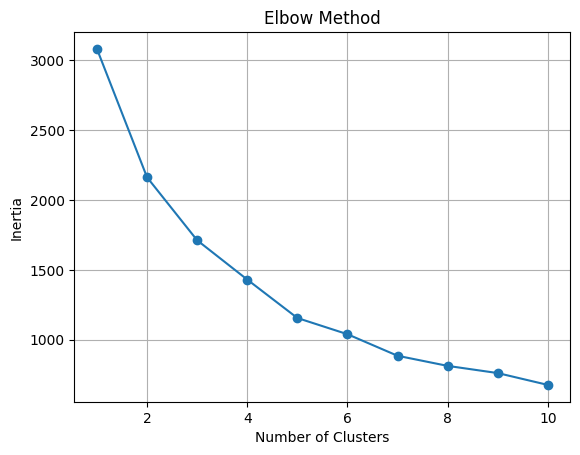

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters


Step 5: Visualize Clusters

Index(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen', 'Region', 'Cluster', 'DBSCAN_Cluster'],
      dtype='object')

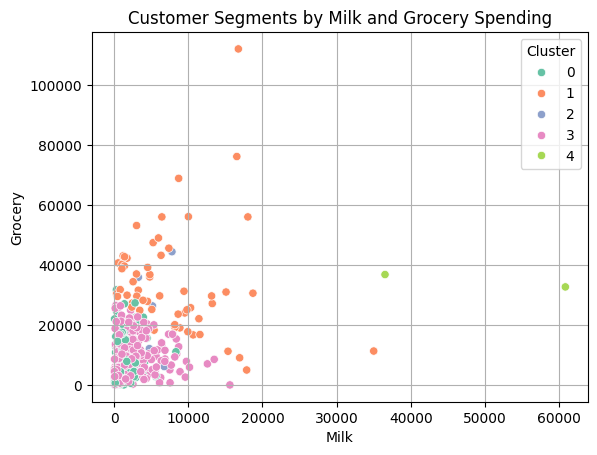

In [50]:
import seaborn as sns
display(df.columns)
sns.scatterplot(data=df, x='Frozen', y='Fresh', hue='Cluster', palette='Set2')
plt.title("Customer Segments by Milk and Grocery Spending")
plt.xlabel("Milk")
plt.ylabel("Grocery")
plt.grid(True)
plt.show()


Step 6: Try Other Algorithms (DBSCAN)

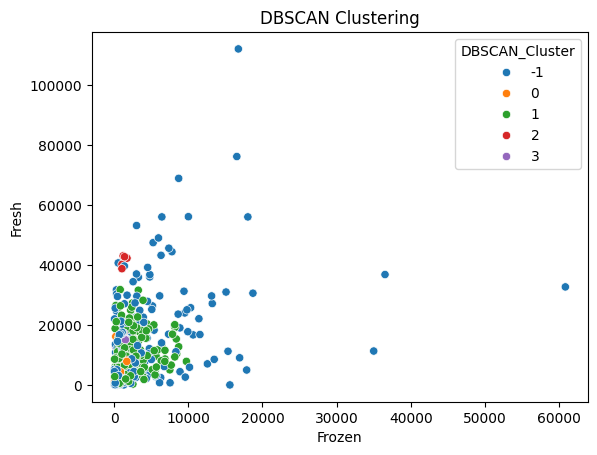

In [51]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = clusters
sns.scatterplot(data=df, x='Frozen', y='Fresh',hue='DBSCAN_Cluster', palette='tab10')
plt.title("DBSCAN Clustering")
plt.show()


Step 7: Evaluate Clustering

In [52]:
from sklearn.metrics import silhouette_score
score_kmeans = silhouette_score(X_scaled, df['Cluster'])
score_dbscan = silhouette_score(X_scaled, df['DBSCAN_Cluster'])
print("Silhouette Score - KMeans:", score_kmeans)
print("Silhouette Score - DBSCAN:", score_dbscan)

Silhouette Score - KMeans: 0.43505110464682606
Silhouette Score - DBSCAN: 0.07786234957757818
